<a href="https://colab.research.google.com/github/Tyr372001/Dive-into-Advanced-Subjects-in-Computer-Science/blob/main/ApplyingLBPinMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from skimage.feature import local_binary_pattern
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading MNIST datasets

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#Normalizing the pixel values of the images

x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
#Initializing the LBP parameters

radius = 1
n_points = 8*radius

In [5]:
#Function to compute LBP for each image

def compute_LBP(images):
  lbp_images = []
  for image in images:
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    lbp_images.append(lbp)
  return lbp_images

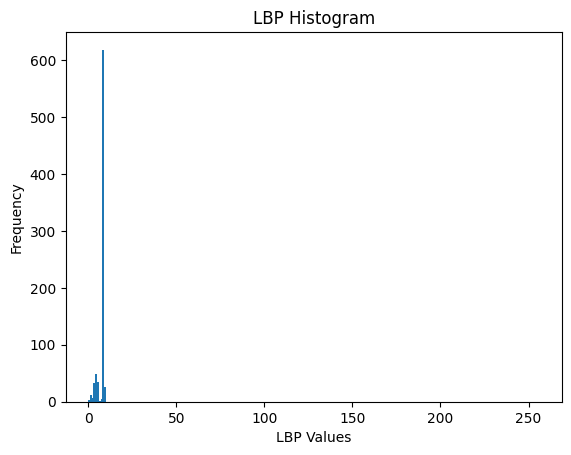

In [8]:
# Assuming 'lbp_train' contains your LBP images
plt.hist(lbp_train[0].ravel(), bins=256, range=(0, 256))
plt.xlabel('LBP Values')
plt.ylabel('Frequency')
plt.title('LBP Histogram')
plt.show()

In [9]:
flattened_lbp_train = [image.ravel() for image in lbp_train]
flattened_lbp_test = [image.ravel() for image in lbp_test]

In [12]:
# Reshape the flattened data to 2D
# -1 infers the number of samples based on the original shape
reshaped_lbp_train = np.array(flattened_lbp_train).reshape(len(flattened_lbp_train), -1)
reshaped_lbp_test = np.array(lbp_test).reshape(len(lbp_test), -1)

In [13]:
# Import and initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000) # Increase max_iter if needed

In [14]:
# Train the model
model.fit(reshaped_lbp_train, y_train)

# Predict on the test set
y_pred = model.predict(reshaped_lbp_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8901
